In [2]:
!pip install textblob

  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
    --------------------------------------- 10.2/624.3 kB ? eta -:--:--
   ---- ---------------------------------- 71.7/624.3 kB 787.7 kB/s eta 0:00:01
   ----------- ---------------------------- 174.1/624.3 kB 1.5 MB/s eta 0:00:01
   -------------------------------- ------- 501.8/624.3 kB 2.9 MB/s eta 0:00:01
   ---------------------------------------- 624.3/624.3 kB 3.0 MB/s eta 0:00:00
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

In [5]:
# Load cleaned dataset
df = pd.read_csv("liar_cleaned.csv")

# Display basic dataset info
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()

Dataset Shape: (12790, 14)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12790 entries, 0 to 12789
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   label                12790 non-null  object 
 1   statement            12790 non-null  object 
 2   subject              12790 non-null  object 
 3   speaker              12790 non-null  object 
 4   speaker_job          12790 non-null  object 
 5   state                12790 non-null  object 
 6   party_affiliation    12790 non-null  object 
 7   barely_true_count    12788 non-null  float64
 8   false_count          12788 non-null  float64
 9   half_true_count      12788 non-null  float64
 10  mostly_true_count    12788 non-null  float64
 11  pants_on_fire_count  12788 non-null  float64
 12  context              12790 non-null  object 
 13  binary_label         12790 non-null  int64  
dtypes: float64(5), int64(1), object(8)
memory us


Summary Statistics:
       barely_true_count   false_count  half_true_count  mostly_true_count  \
count       12788.000000  12788.000000     12788.000000       12788.000000   
mean           11.584532     13.359712        17.186816          16.498749   
std            18.978660     24.140917        35.848890          36.166548   
min             0.000000      0.000000         0.000000           0.000000   
25%             0.000000      0.000000         0.000000           0.000000   
50%             2.000000      2.000000         3.000000           3.000000   
75%            12.000000     15.000000        13.000000          12.000000   
max            70.000000    114.000000       160.000000         163.000000   

       pants_on_fire_count  binary_label  
count         12788.000000  12790.000000  
mean              6.251408      0.557701  
std              16.181410      0.496679  
min               0.000000      0.000000  
25%               0.000000      0.000000  
50%               

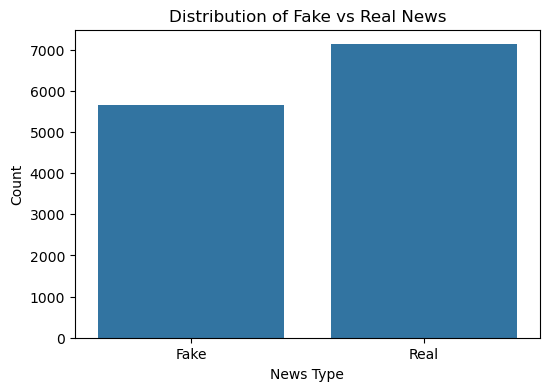

In [6]:
# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())

# Distribution of labels
plt.figure(figsize=(6, 4))
sns.countplot(x=df['binary_label'])
plt.title("Distribution of Fake vs Real News")
plt.xticks(ticks=[0, 1], labels=["Fake", "Real"])
plt.xlabel("News Type")
plt.ylabel("Count")
plt.show()

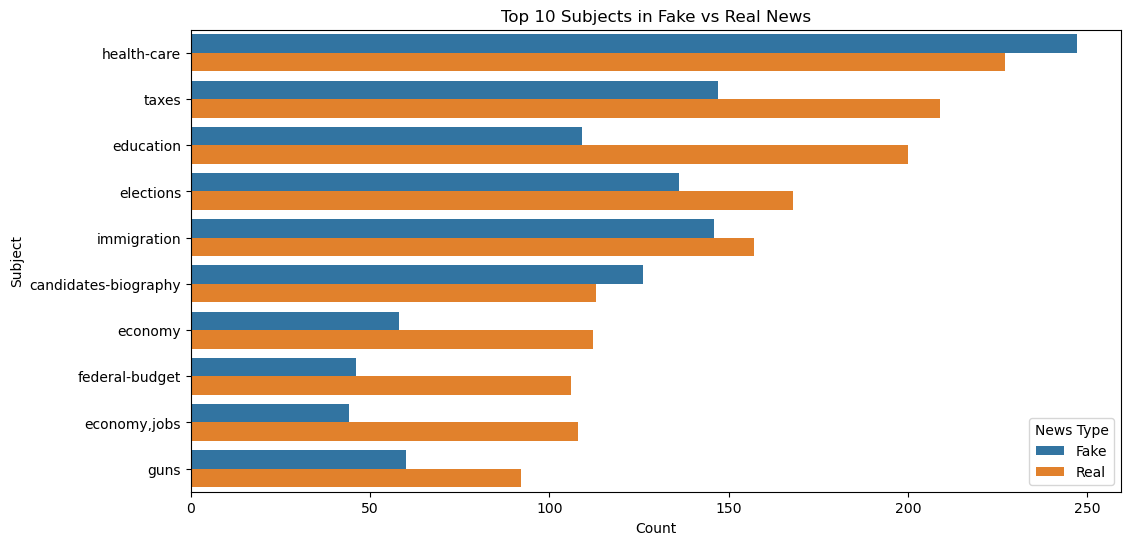

In [7]:
# Most common subjects in fake vs real news
plt.figure(figsize=(12, 6))
sns.countplot(y=df['subject'], order=df['subject'].value_counts().index[:10], hue=df['binary_label'])
plt.title("Top 10 Subjects in Fake vs Real News")
plt.xlabel("Count")
plt.ylabel("Subject")
plt.legend(title="News Type", labels=["Fake", "Real"])
plt.show()

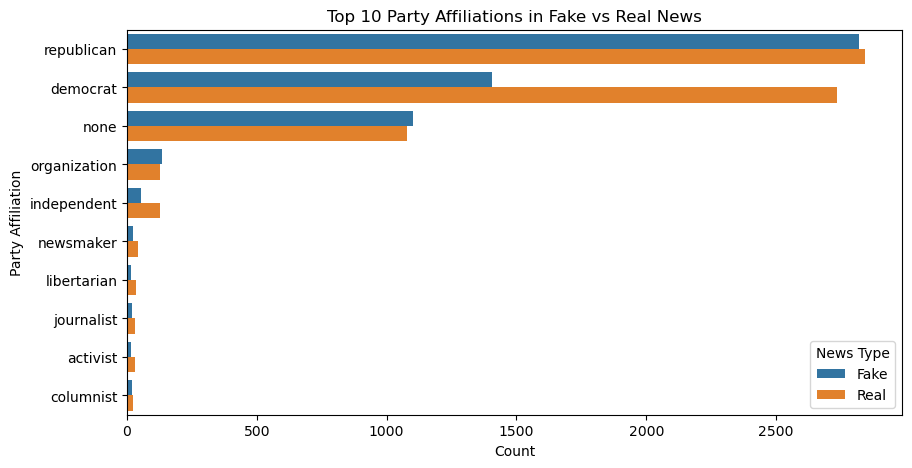

In [8]:
# Analyzing party affiliation trends
plt.figure(figsize=(10, 5))
sns.countplot(y=df['party_affiliation'], order=df['party_affiliation'].value_counts().index[:10], hue=df['binary_label'])
plt.title("Top 10 Party Affiliations in Fake vs Real News")
plt.xlabel("Count")
plt.ylabel("Party Affiliation")
plt.legend(title="News Type", labels=["Fake", "Real"])
plt.show()

In [9]:
# Sentiment Analysis on Statements
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['sentiment'] = df['statement'].apply(get_sentiment)

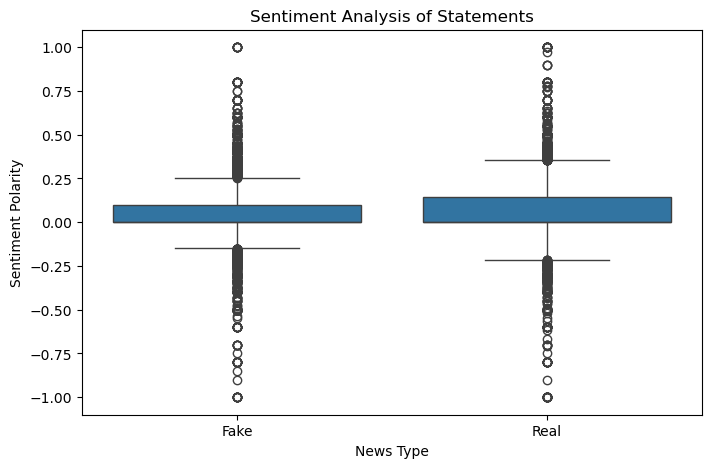

In [10]:
# Sentiment distribution by news type
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['binary_label'], y=df['sentiment'])
plt.title("Sentiment Analysis of Statements")
plt.xticks(ticks=[0, 1], labels=["Fake", "Real"])
plt.xlabel("News Type")
plt.ylabel("Sentiment Polarity")
plt.show()

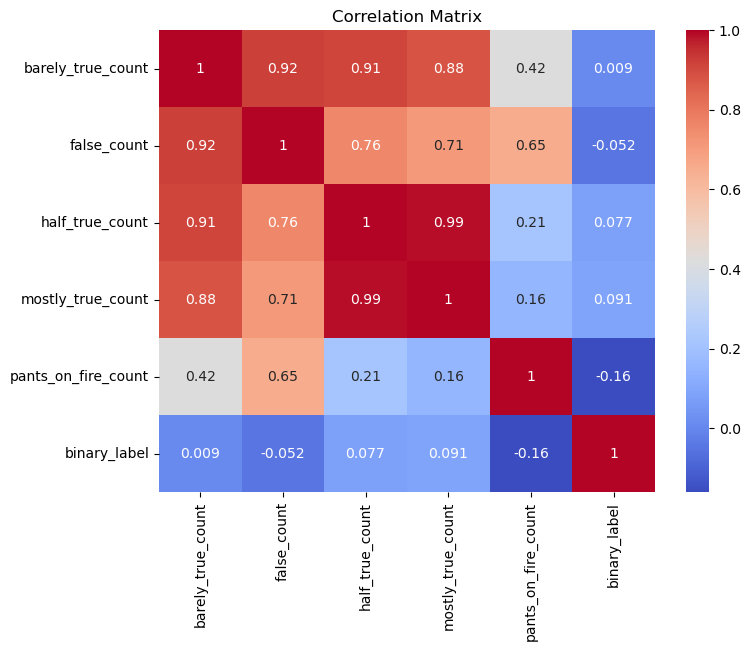

In [11]:
# Correlation analysis between numerical columns
plt.figure(figsize=(8, 6))
sns.heatmap(df[["barely_true_count", "false_count", "half_true_count", "mostly_true_count", "pants_on_fire_count", "binary_label"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()